In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CP_ALS3 as cp

## Sparse Random Tensor

In [33]:
%%time
init_shape = (17, 16, 15)
coo, vals, nnz = cp.coo_tensor_gen(init_shape, density=0.02)
assert cp.check_coo_tensor(coo, nnz)!= "Bad"

CPU times: user 1.15 ms, sys: 109 µs, total: 1.26 ms
Wall time: 1.28 ms


In [34]:
nnz

81

In [94]:
%%time
max_iter = 10
rank = 210
a, b, c, err = cp.cp_als3(coo, vals, nnz, init_shape, rank=rank, max_iter=max_iter)

iterations over
CPU times: user 852 ms, sys: 28.1 ms, total: 880 ms
Wall time: 442 ms


In [95]:
error = cp.sqrt_err(coo, vals, nnz, init_shape, a, b, c)
rerror = cp.sqrt_err_relative(coo, vals, nnz, init_shape, a, b, c)
print(f"Abs err = {error};\nRel err = {rerror};")

Abs err = 0.00042868110089259136;
Rel err = 9.248985019900296e-05;


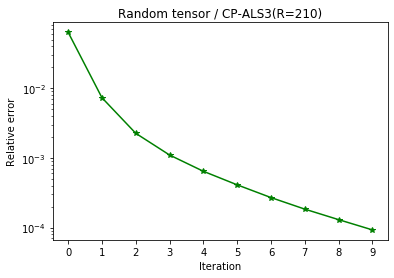

In [96]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"Random tensor / CP-ALS3(R={rank})")
plt.xticks(np.arange(max_iter))
plt.yscale("log")
plt.plot(np.arange(max_iter), err[:max_iter], 'g-*')

## Hilbert Tensor

In [97]:
from numba import jit

In [98]:
@jit(nopython=True)
def generate_hilbert(shape):
    coo = []
    vals = []
    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                coo.append((i, j, k))
                vals.append(1 / (i + j + k + 3))
    
    coo = np.array(coo)
    vals = np.array(vals)
    return coo, vals            

In [99]:
coo, vals = generate_hilbert((3, 3, 3))

In [182]:
%%time
max_iter = 10
rank = 6
a, b, c, err = cp.cp_als3(coo, vals, 27, (3, 3, 3), rank=rank, max_iter=max_iter)

iterations over
CPU times: user 1.2 ms, sys: 79 µs, total: 1.28 ms
Wall time: 1.26 ms


In [183]:
rerror = cp.sqrt_err_relative(coo, vals, 27, (3, 3, 3), a, b, c)
print(f"Rel err = {rerror};")

Rel err = 8.88388580570295e-05;


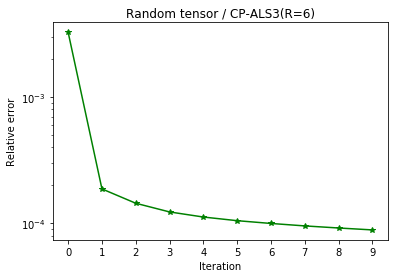

In [184]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"Random tensor / CP-ALS3(R={rank})")
plt.xticks(np.arange(max_iter))
plt.yscale("log")
plt.plot(np.arange(max_iter), err[:max_iter], 'g-*')

In [185]:
minima = 200
for i in range(rank):
    for j in range(rank):
        for k in range(rank):
            for m in range(rank):
                for n in range(rank):
                    for z in range(rank):
                            slicer = [i, j, k, m, n, z]
                            rerror = cp.sqrt_err_relative(
                                coo,
                                vals,
                                27,
                                (3, 3, 3),
                                a[:, slicer],
                                b[:, slicer],
                                c[:, slicer],
                            )
                            if rerror <= minima:
                                minima = rerror
                                params = [i, j, k, m, n, z]
                                params.sort()

print(f"Rel err = {minima}; {params}")

Rel err = 8.883885805668126e-05; [0, 1, 2, 3, 4, 5]
